In [1]:
from sklearn.preprocessing import LabelEncoder
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [36]:
df = pd.read_csv('fixed_floats.csv')

In [3]:
cat_features = ['cntroom', 'floor', 'maxfloor', 'year', 'heating', 'parking', 'repair', 'window', 'credit', 'deal', 'typeofhousing', 
                'typeofhouse', 'district', 'pas', 'gruz', 'combined', 'separate', 'lodge', 'balkone']

In [4]:
TARGET_NAME = 'price2'

In [5]:
RANDOM_STATE = 42

In [6]:
str_col = df.select_dtypes(include=['object']).columns

In [7]:
label_encoders = {}

In [8]:
df['year'].fillna(0, inplace=True)
df['year'] = df['year'].astype('int')

C:\Users\rshir\AppData\Local\Temp\ipykernel_17712\4245370163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(0, inplace=True)


In [9]:
for col in str_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
df

,cntroom,floor,maxfloor,livingarea,totalarea,kitchenarea,year,ceiling,finishing,garbage,...,typeofhouse,district,width,long,pas,gruz,combined,separate,lodge,balkone
0,3,7,24,74.0,93.00,NaN,2021,NaN,7,2,...,3,5,55.754031,37.543138,0,0,2,0,1,0
1,3,6,10,43.8,90.50,7.7,0,3.20,0,2,...,2,1,55.542115,37.428486,22,1,0,0,0,0
2,4,2,25,180.0,236.00,20.0,2000,3.00,7,2,...,2,1,55.728003,37.443533,3,3,2,0,0,0
3,4,14,39,48.0,89.00,16.0,2022,3.00,7,0,...,6,1,55.728003,37.443533,3,2,2,0,0,0
4,4,32,39,62.0,109.00,18.0,2022,3.10,7,1,...,6,1,55.728003,37.443533,5,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,3,2,44,NaN,84.20,NaN,0,3.24,2,2,...,3,3,55.796977,37.624687,0,0,0,0,0,0
4182,3,3,6,NaN,89.40,NaN,0,3.24,0,2,...,3,4,55.773236,37.467904,0,0,0,0,0,0
4183,3,7,41,45.4,111.78,16.0,0,3.10,0,2,...,3,5,55.752116,37.526609,2,2,1,1,0,0
4184,3,29,32,27.4,65.30,25.8,0,3.02,7,2,...,3,4,55.760646,37.516036,0,0,1,1,0,0


In [11]:
data = train_test_split(df.drop([TARGET_NAME], axis=1), df[TARGET_NAME], train_size=0.8, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = data

In [12]:
X_train.columns.to_list()

['cntroom',
 'floor',
 'maxfloor',
 'livingarea',
 'totalarea',
 'kitchenarea',
 'year',
 'ceiling',
 'finishing',
 'garbage',
 'heating',
 'parking',
 'repair',
 'window',
 'credit',
 'deal',
 'typeofhousing',
 'typeofhouse',
 'district',
 'width',
 'long',
 'pas',
 'gruz',
 'combined',
 'separate',
 'lodge',
 'balkone']

In [13]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [14]:
model = CatBoostRegressor(
    learning_rate=0.3,
    iterations = 2000
)

In [15]:
model.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 304874.5516715	test: 283172.4877838	best: 283172.4877838 (0)	total: 287ms	remaining: 9m 33s
1:	learn: 271332.5127564	test: 261391.7508228	best: 261391.7508228 (1)	total: 368ms	remaining: 6m 7s
2:	learn: 245916.0459477	test: 245100.4030766	best: 245100.4030766 (2)	total: 491ms	remaining: 5m 26s
3:	learn: 232504.9360558	test: 238588.6509103	best: 238588.6509103 (3)	total: 572ms	remaining: 4m 45s
4:	learn: 216545.1532749	test: 230806.9457088	best: 230806.9457088 (4)	total: 639ms	remaining: 4m 15s
5:	learn: 208990.3261333	test: 225729.4691475	best: 225729.4691475 (5)	total: 691ms	remaining: 3m 49s
6:	learn: 202998.1212013	test: 222812.7959835	best: 222812.7959835 (6)	total: 749ms	remaining: 3m 33s
7:	learn: 195810.9538042	test: 217307.3734644	best: 217307.3734644 (7)	total: 808ms	remaining: 3m 21s
8:	learn: 194561.8340481	test: 217317.4594948	best: 217307.3734644 (7)	total: 837ms	remaining: 3m 5s
9:	learn: 189556.7911926	test: 214212.4664380	best: 214212.4664380 (9)	total: 905ms	

In [16]:
model.get_params()

{'iterations': 2000, 'learning_rate': 0.3, 'loss_function': 'RMSE'}

In [17]:
y_pred = model.predict(X_test)

In [18]:
# Calculate regression metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

Mean Squared Error (MSE): 29481749089.7120
Root Mean Squared Error (RMSE): 171702.5017
R-squared (R^2): 0.7006
Explained Variance Score: 0.7007


In [19]:
# Получение важности признаков
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


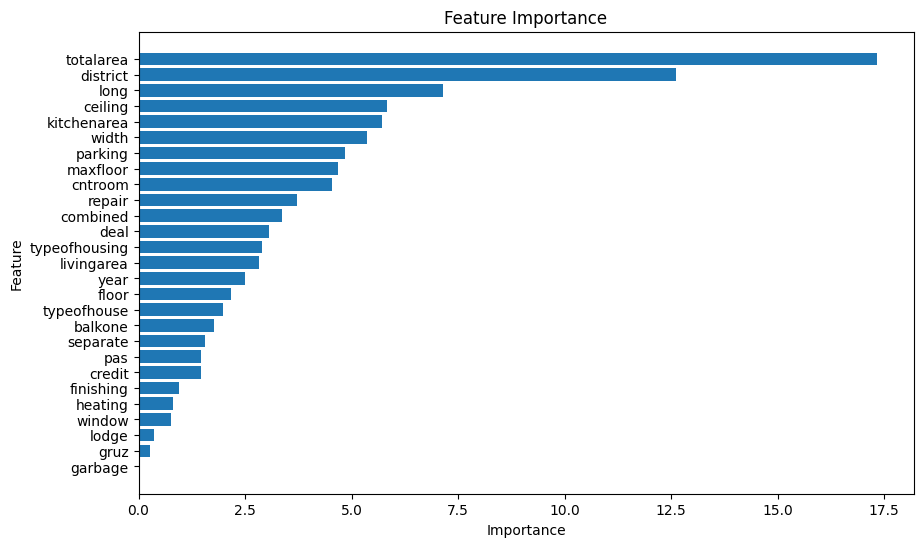

In [20]:
# Визуализация важности признаков
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [21]:
grid = {'learning_rate': [0.001, 0.01, 0.1], 'depth': [4,8,16,24,32,60]}

In [22]:
model.save_model('bs_catboost')

In [23]:
BEST_FEATURE = ['totalarea', 'cntroom', 'district', 'long', 'ceiling', 'kitchenarea', 'width', 'maxfloor', 'livingarea']

In [24]:
cat_features = ['cntroom', 'maxfloor', 'district', 'maxfloor']

In [25]:
df_new = df[BEST_FEATURE+[TARGET_NAME]]

In [26]:
data = train_test_split(df_new.drop([TARGET_NAME], axis=1), df_new[TARGET_NAME], train_size=0.8, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = data

In [27]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [30]:
model_top_f = CatBoostRegressor(iterations=2000, learning_rate=0.3)

In [31]:
model_top_f.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 302883.6071910	test: 278887.1612429	best: 278887.1612429 (0)	total: 79.3ms	remaining: 2m 38s
1:	learn: 268565.7730013	test: 258843.9411996	best: 258843.9411996 (1)	total: 149ms	remaining: 2m 28s
2:	learn: 250268.3704610	test: 248154.2118662	best: 248154.2118662 (2)	total: 215ms	remaining: 2m 22s
3:	learn: 231677.3693020	test: 237517.3203013	best: 237517.3203013 (3)	total: 257ms	remaining: 2m 8s
4:	learn: 218240.7287154	test: 229145.4886512	best: 229145.4886512 (4)	total: 309ms	remaining: 2m 3s
5:	learn: 208687.2889035	test: 226221.0950111	best: 226221.0950111 (5)	total: 349ms	remaining: 1m 56s
6:	learn: 203122.7358276	test: 222279.3494755	best: 222279.3494755 (6)	total: 399ms	remaining: 1m 53s
7:	learn: 199836.7930236	test: 221225.0399232	best: 221225.0399232 (7)	total: 470ms	remaining: 1m 57s
8:	learn: 194068.1155571	test: 218774.2681727	best: 218774.2681727 (8)	total: 541ms	remaining: 1m 59s
9:	learn: 190146.1445843	test: 216724.1199759	best: 216724.1199759 (9)	total: 627ms

In [32]:
model_top_f.save_model('top_fet_catboost')

In [33]:
import plotly.express as px
import plotly.io as pio

In [34]:
col_gr = ['cntroom', 'price2', 'totalarea']

In [ ]:
fig = px.scatter(df[col_gr], x='Кол-во комнат', y='Цена продажи', color='Общая площадь')

In [37]:
import plotly.express as px
import pandas as pd

# Пример данных (замените на ваш DataFrame)
data = {
    'cntroom': [1, 2, 3, 4, 5],
    'price2': [100000, 150000, 200000, 250000, 300000],
    'totalarea': [50, 75, 100, 125, 150]
}
# df = pd.DataFrame(data)

# Определяем колонки
col_gr = ['cntroom', 'price2', 'totalarea']

# Создаем график scatter plot с использованием Plotly Express
fig = px.scatter(df, x='cntroom', y='price2', color='totalarea',
                 labels={'cntroom': 'Количество комнат', 'price2': 'Цена', 'totalarea': 'Общая площадь'},
                 title='Зависимость цены от количества комнат и общей площади')

# Отображаем график
fig.show()


In [40]:
import plotly.express as px
df = pd.read_csv('fixed_floats.csv')
fig = px.box(df, x='cntroom', y='price2')
fig.show()


In [42]:
import plotly.express as px
df = pd.read_csv('fixed_floats.csv')
fig = px.box(df, x='cntroom', y='price2', points="all")
fig.show()

In [25]:
result = model_grid.grid_search(grid, train_pool)

0:	learn: 540065.1616226	test: 551656.5025762	best: 551656.5025762 (0)	total: 4.14ms	remaining: 8.28s
1:	learn: 539637.2352805	test: 551226.0122179	best: 551226.0122179 (1)	total: 13.1ms	remaining: 13.1s
2:	learn: 539192.9740370	test: 550775.2655308	best: 550775.2655308 (2)	total: 22.7ms	remaining: 15.1s
3:	learn: 538771.5488185	test: 550355.9900662	best: 550355.9900662 (3)	total: 33.9ms	remaining: 16.9s
4:	learn: 538335.0318602	test: 549914.1532022	best: 549914.1532022 (4)	total: 46.2ms	remaining: 18.4s
5:	learn: 537909.4014980	test: 549483.3528127	best: 549483.3528127 (5)	total: 56.8ms	remaining: 18.9s
6:	learn: 537493.3305168	test: 549067.3537189	best: 549067.3537189 (6)	total: 67.7ms	remaining: 19.3s
7:	learn: 537082.4098529	test: 548654.8046730	best: 548654.8046730 (7)	total: 71.6ms	remaining: 17.8s
8:	learn: 536666.1159999	test: 548241.3861987	best: 548241.3861987 (8)	total: 82.6ms	remaining: 18.3s
9:	learn: 536242.5208310	test: 547821.2172733	best: 547821.2172733 (9)	total: 94.1

KeyboardInterrupt: 

In [54]:
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

# df = px.data.election()
df = pd.read_csv('fixed_floats.csv')
df = df[['long','width', 'price2']]
geometry = [Point(xy) for xy in zip(df['long'], df['width'])]

# Преобразование DataFrame в GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.set_crs(epsg=4326, inplace=True)

# Визуализация данных на карте с использованием Plotly
fig = px.scatter_mapbox(geo_df,
                        lat=geo_df.geometry.y,
                        lon=geo_df.geometry.x,
                        color="price2",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=8.5,
                        center={"lat": 55.755613, "lon": 37.621979},
                        mapbox_style="open-street-map")

fig.show()

In [47]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Пример данных (замените на ваш DataFrame)
data = {
    'latitude': [55.7558, 59.9343, 56.8389],
    'longitude': [37.6173, 30.3351, 60.6057],
    'cntroom': [1, 2, 3],
    'price2': [100000, 150000, 200000],
    'totalarea': [50, 75, 100]
}
df = pd.read_csv('fixed_floats.csv')
df = df[['long','width', 'price2']]
# Создание геометрической колонки с использованием координат
geometry = [Point(xy) for xy in zip(df['long'], df['width'])]

# Преобразование DataFrame в GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Установка системы координат (например, WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Проверка GeoDataFrame
print(gdf)


           long      width   price2                   geometry
0     37.543138  55.754031  1064516  POINT (37.54314 55.75403)
1     37.428486  55.542115   532602  POINT (37.42849 55.54212)
2     37.443533  55.728003   211441  POINT (37.44353 55.72800)
3     37.443533  55.728003   561798  POINT (37.44353 55.72800)
4     37.443533  55.728003   458716  POINT (37.44353 55.72800)
...         ...        ...      ...                        ...
4181  37.624687  55.796977   470803  POINT (37.62469 55.79698)
4182  37.467904  55.773236   446000  POINT (37.46790 55.77324)
4183  37.526609  55.752116   378268  POINT (37.52661 55.75212)
4184  37.516036  55.760646   670933  POINT (37.51604 55.76065)
4185  37.597252  55.798723   577069  POINT (37.59725 55.79872)

[4186 rows x 4 columns]


In [51]:
df

,long,width,price2
0,37.543138,55.754031,1064516
1,37.428486,55.542115,532602
2,37.443533,55.728003,211441
3,37.443533,55.728003,561798
4,37.443533,55.728003,458716
...,...,...,...
4181,37.624687,55.796977,470803
4182,37.467904,55.773236,446000
4183,37.526609,55.752116,378268
4184,37.516036,55.760646,670933
